In [2]:
print("Hello world!")

Hello world!

### functions

In [3]:
# function to calculate the volume of a sphere
function sphere_vol(r)
    # julia allows Unicode names (in UTF-8 encoding)
    # so either "pi" or the symbol π can be used
    return 4/3*pi*r^3
end

# functions can also be defined more succinctly
quadratic(a, sqr_term, b) = (-b + sqr_term) / 2a

# calculates x for 0 = a*x^2+b*x+c, arguments types can be defined in function definitions
function quadratic2(a::Float64, b::Float64, c::Float64)
    # unlike other languages 2a is equivalent to 2*a
    # a^2 is used instead of a**2 or pow(a,2)
    sqr_term = sqrt(b^2-4a*c)
    r1 = quadratic(a, sqr_term, b)
    r2 = quadratic(a, -sqr_term, b)
    # multiple values can be returned from a function using tuples
    # if the return keyword is omitted, the last term is returned
    r1, r2
end

vol = sphere_vol(3)
# @printf allows number formatting but does not automatically append the \n to statements, see below
@printf "volume = %0.3f\n" vol 
#> volume = 113.097

quad1, quad2 = quadratic2(2.0, -2.0, -12.0)
println("result 1: ", quad1)
#> result 1: 3.0
println("result 2: ", quad2)
#> result 2: -2.0

volume = 113.097
result 1: 3.0
result 2: -2.0


### Strings

In [4]:
# strings are defined with double quotes
# like variables, strings can contain any unicode character
s1 = "The quick brown fox jumps over the lazy dog α,β,γ"
println(s1)
#> The quick brown fox jumps over the lazy dog α,β,γ

# println adds a new line to the end of output
# print can be used if you dont want that:
print("this")
#> this
print(" and")
#> and
print(" that.\n")
#> that.

# chars are defined with single quotes
c1 = 'a'
println(c1)
#> a
# the ascii value of a char can be found with Int():
println(c1, " ascii value = ", Int(c1))
#> a ascii value = 97
println("Int('α') == ", Int('α'))
#> Int('α') == 945

# so be aware that
println(Int('1') == 1)
#> false

# strings can be converted to upper case or lower case:
s1_caps = uppercase(s1)
s1_lower = lowercase(s1)
println(s1_caps, "\n", s1_lower)
#> THE QUICK BROWN FOX JUMPS OVER THE LAZY DOG Α,Β,Γ
#> the quick brown fox jumps over the lazy dog α,β,γ

# sub strings can be indexed like arrays:
# (show prints the raw value)
show(s1[11]); println()
#> 'b'

# or sub strings can be created:
show(s1[1:10]); println()
#> "The quick "

# end is used for the end of the array or string
show(s1[end-10:end]); println()
#> "dog α,β,γ"

# julia allows string Interpolation:
a = "wolcome"
b = "julia"
println("$a to $b.")
#> wolcome to julia.

# this can extend to evaluate statements:
println("1 + 2 = $(1 + 2)")
#> 1 + 2 = 3

# strings can also be concatenated using the * operator
# using * instead of + isn't intuitive when you start with Julia,
# however people think it makes more sense
s2 = "this" * " and" * " that"
println(s2)
#> this and that

# as well as the string function
s3 = string("this", " and", " that")
println(s3)
#> this and that

The quick brown fox jumps over the lazy dog α,β,γ
this and that.
a
a ascii value = 97
Int('α') == 945
false
THE QUICK BROWN FOX JUMPS OVER THE LAZY DOG Α,Β,Γ
the quick brown fox jumps over the lazy dog α,β,γ
'b'
"The quick "
"dog α,β,γ"
wolcome to julia.
1 + 2 = 3
this and that
this and that


### arrays

In [10]:
function printsum(a)
    # summary generates a summary of an object
    println(summary(a), ": ", repr(a))
end

# arrays can be initialised directly:
a1 = [1,2,3]
printsum(a1)
#> 3-element Array{Int64,1}: [1,2,3]

# or initialised empty:
a2 = []
printsum(a2)
#> 0-element Array{None,1}: None[]

# since this array has no type, functions like push! (see below) don't work
# instead arrays can be initialised with a type:
a3 = Int64[]
printsum(a3)
#> 0-element Array{Int64,1}: []

# ranges are different from arrays:
a4 = 1:20
printsum(a4)
#> 20-element UnitRange{Int64}: 1:20

# however they can be used to create arrays thus:
a4 = collect(1:20)
printsum(a4)
#> 20-element Array{Int64,1}: [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]

# arrays can also be generated from comprehensions:
a5 = [2^i for i = 1:10]
printsum(a5)
#> 10-element Array{Int64,1}: [2,4,8,16,32,64,128,256,512,1024]

# arrays can be any type, so arrays of arrays can be created:
a6 = (Array{Int64, 1})[]
printsum(a6)
#> 0-element Array{Array{Int64,1},1}: []
# (note this is a "jagged array" (i.e., an array of arrays), not a multidimensional array, these are not covered here)

# Julia provided a number of "Dequeue" functions, the most common for appending to the end of arrays is push!
# ! at the end of a function name indicates that the first argument is updated.

push!(a1, 4)
printsum(a1)
#> 4-element Array{Int64,1}: [1,2,3,4]

# push!(a2, 1) would cause error:

push!(a3, 1)
printsum(a3) #> 1-element Array{Int64,1}: [1]
#> 1-element Array{Int64,1}: [1]

push!(a6, [1,2,3])
printsum(a6)
#> 1-element Array{Array{Int64,1},1}: [[1,2,3]]

# using repeat() to create arrays
# you must use the keywords "inner" and "outer"
# all arguments must be arrays (not ranges)
a7 = repeat(a1,inner=[2],outer=[1])
printsum(a7)
#> 8-element Array{Int64,1}: [1,1,2,2,3,3,4,4]
a8 = repeat([4:-1:1],inner=[1],outer=[2])
printsum(a8)
#> 8-element Array{Int64,1}: [4,3,2,1,4,3,2,1]

3-element Array{Int64,1}: [1,2,3]
0-element Array{Any,1}: Any[]
0-element Array{Int64,1}: Int64[]
20-element UnitRange{Int64}: 1:20
20-element Array{Int64,1}: [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
10-element Array{Int64,1}: [2,4,8,16,32,64,128,256,512,1024]
0-element Array{Array{Int64,1},1}: Array{Int64,1}[]
4-element Array{Int64,1}: [1,2,3,4]
1-element Array{Int64,1}: [1]
1-element Array{Array{Int64,1},1}: [[1,2,3]]
8-element Array{Int64,1}: [1,1,2,2,3,3,4,4]
8-element Array{Int64,1}: [4,3,2,1,4,3,2,1]


 in depwarn at deprecated.jl:73
 in oldstyle_vcat_warning at ./abstractarray.jl:29
 in vect at abstractarray.jl:32
 in include_string at loading.jl:282
 in execute_request_0x535c5df2 at /home/nima/.julia/v0.4/IJulia/src/execute_request.jl:183
 in eventloop at /home/nima/.julia/v0.4/IJulia/src/IJulia.jl:143
 in anonymous at task.jl:447
while loading In[10], in expression starting on line 66


### plots

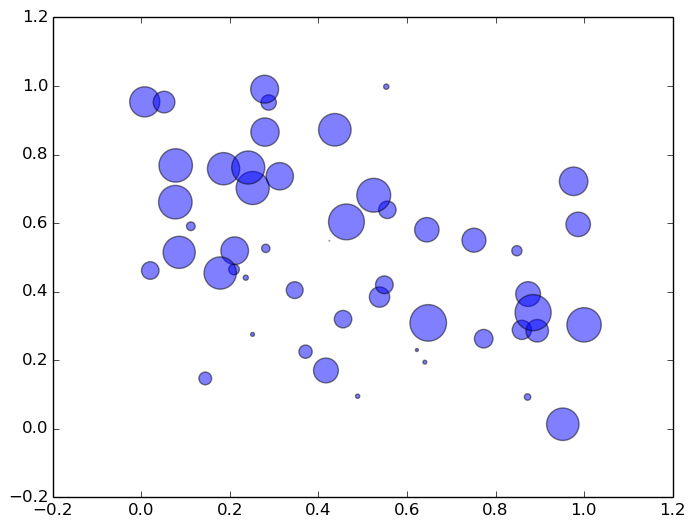

PyObject <matplotlib.collections.PathCollection object at 0x7efff1c04410>

In [5]:
using PyPlot

n = 50
srand(1)
x = rand(n)
y = rand(n)
area = pi .* (15 .* rand(n)).^2 # 0 to 15 point radiuses
scatter(x, y, s=area, alpha=0.5)

In [9]:
a = rand(2, 2)
b = rand(2, 2)
c = a.*b
println(a)
println(b)
println(c)

[0.3714904399932142 0.11459727224260452
 0.10369066522262793 0.28951858291491916]
[0.7447353030164021 0.6183223793578425
 0.15755639598925963 0.5727890180392909]
[0.2766620453960429 0.07085805804096566
 0.01633712751020612 0.16583306481196358]


In [6]:
using QuantEcon: tauchen

tauchen(4, 0.9, 1)

Discrete Markov Chain
stochastic matrix of type Array{Float64,2}:
4x4 Array{Float64,2}:
 0.945853     0.0541468    2.92863e-10  0.0        
 0.00580845   0.974718     0.0194737    1.43534e-11
 1.43534e-11  0.0194737    0.974718     0.00580845 
 2.08117e-27  2.92863e-10  0.0541468    0.945853   

### Parallel

In [10]:
addprocs(7)

nheads = @parallel (+) for i=1:1000
    Int(rand(Bool))
end


510

In [7]:
procs()

8-element Array{Int64,1}:
 1
 2
 3
 4
 5
 6
 7
 8

In [8]:
rmprocs(1:8)

:ok